In [16]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import  generate_random_map

import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import torch


from function_approximation.environments.frozen_lake.wrappers import FrozenLakeVectorObservationWrapper
from function_approximation.rl_algorithms.exploration import GreedyExploration, EpsilonGreedyExploration, SoftmaxExploration
from function_approximation.rl_algorithms.agents import PERDuelingDoubleDeepNStepTreeBackup, DuelingDoubleDeepQNetwork,\
    PERDuelingDoubleDeepQNetwork, PERDuelingDoubleDeepSarsa, PERDuelingDoubleDeepNStepSarsa
from function_approximation.environments.frozen_lake.utils import run_and_display_env
from function_approximation.environments.frozen_lake.utils import run_and_display_env, run_and_record_env, play_videos_in_jupyter, remove_videos
from function_approximation.environments.frozen_lake.utils import plot_with_matplotlib, plot_with_seaborn, plot_q_values_map


In [17]:
map_size = 8
proba_frozen = 0.94
seed = 7
max_episode_steps = 300
is_slippery = True

env = gym.make(
      "FrozenLake-v1",
      is_slippery=is_slippery,
      render_mode="rgb_array",
      desc=generate_random_map(size=map_size, p=proba_frozen, seed=seed),
      max_episode_steps= max_episode_steps,)

modified_env = FrozenLakeVectorObservationWrapper(
    env=env,
    step_reward=-1,
    hole_reward=-10,
    goal_reward=10,
    active_neighbour=2,
    seed=seed)

print(modified_env)
print(modified_env.env)
print(modified_env.env.env)
print(modified_env.observation_space.n)
print(modified_env.observation_shape)
print(modified_env.action_space.n)

<FrozenLakeVectorObservationWrapper<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>>
<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>
<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>
64
(144,)
4


In [18]:
# exploration = SoftmaxExploration(
#     temperature_start=1.0,
#     temperature_end=0.1,
#     temperature_decay=None,
#     decay="linear",
#     seed=None
# )

exploration = EpsilonGreedyExploration(
    epsilon_start=0.5,
    epsilon_end=0.1,
    epsilon_decay=0.001,
    decay="linear",
    seed=None
)

# agent = PERDuelingDoubleDeepNStepTreeBackup(
#     env=modified_env,
#     exploration=exploration,
#     n_step=5,
#     lr_start=0.5, lr_end=0.001, lr_decay=0.0001, decay="linear",
#     gamma=0.99, Huberbeta=1.0, buffer_size=2048, batch_size=512, polyak_tau=0.05,
#     alpha_start=0.6, alpha_end=0.9, alpha_increment=1e-3, 
#     beta_start=0.4, beta_end=1.0, beta_increment=1e-4,
#     seed=None, verbose=True
# )

# agent = DuelingDoubleDeepQNetwork(
#     env=modified_env,
#     exploration=exploration, 
#     lr_start=0.5, lr_end=0.005, lr_decay=0.001, decay="linear", 
#     gamma=0.99, Huberbeta=1.0, buffer_size=5000, batch_size=512, polyak_tau=1.0, 
#     seed=None, verbose=False
# )

agent = PERDuelingDoubleDeepQNetwork(
    env=modified_env,
    exploration=exploration,
    lr_start=0.5, lr_end=0.001, lr_decay=0.0001, decay="linear",
    gamma=0.99, Huberbeta=1.0, buffer_size=2048, batch_size=512, polyak_tau=0.01,
    alpha_start=0.6, alpha_end=0.9, alpha_increment=1e-3, 
    beta_start=0.4, beta_end=1.0, beta_increment=1e-4,
    seed=None, verbose=True
)

# agent = PERDuelingDoubleDeepSarsa(
#     env=modified_env,
#     exploration=exploration,
#     lr_start=0.5, lr_end=0.01, lr_decay=0.0001, decay="linear",
#     gamma=0.99, Huberbeta=1.0, buffer_size=5000, batch_size=512, polyak_tau=0.5,
#     alpha_start=0.6, alpha_end=0.9, alpha_increment=1e-3, 
#     beta_start=0.4, beta_end=1.0, beta_increment=1e-4,
#     seed=None, verbose=True
# )

# agent = PERDuelingDoubleDeepNStepSarsa(
#     env=modified_env,
#     exploration=exploration,
#     n_step=5,
#     lr_start=0.5, lr_end=0.01, lr_decay=0.0001, decay="linear",
#     gamma=0.99, Huberbeta=1.0, buffer_size=5000, batch_size=512, polyak_tau=0.5,
#     alpha_start=0.6, alpha_end=0.9, alpha_increment=1e-3, 
#     beta_start=0.4, beta_end=1.0, beta_increment=1e-4,
#     seed=None, verbose=True
# )

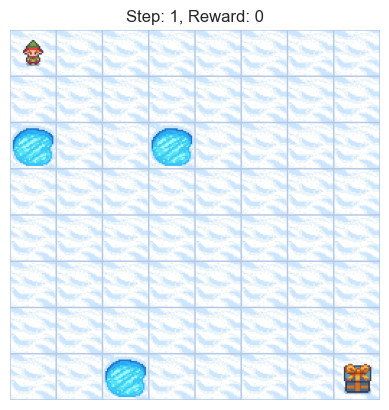

observation: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 0
q_values: tensor([0., 0., 0., 0.], device='cuda:0')
action: 1 - DOWN


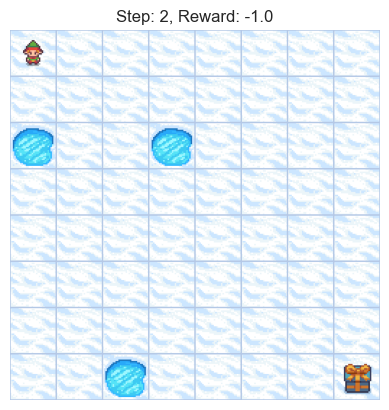

observation: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 0
q_values: tensor([0., 0., 0., 0.], device='cuda:0')
action: 3 - UP


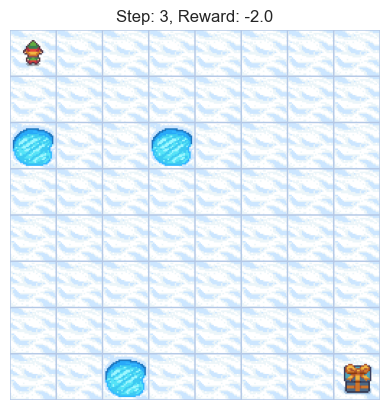

observation: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 0
q_values: tensor([0., 0., 0., 0.], device='cuda:0')
action: 0 - LEFT


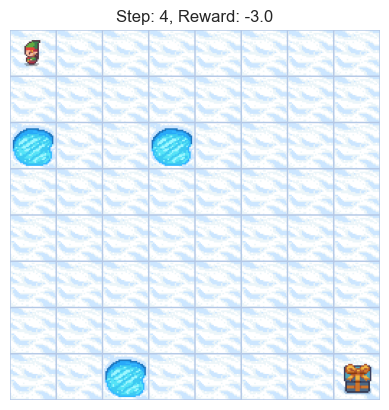

observation: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 0
q_values: tensor([0., 0., 0., 0.], device='cuda:0')
action: 1 - DOWN


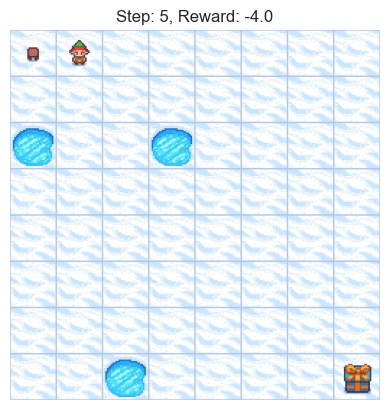

Episode 1 completed with total reward: -4.0 and total steps: 4


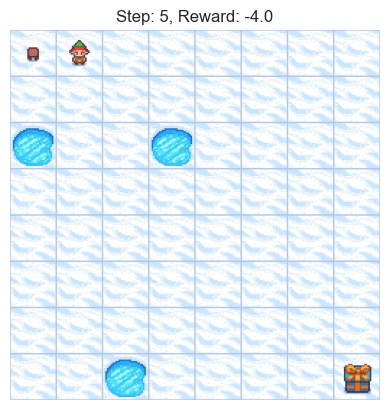

In [19]:
agent.verbose = True
agent.evaluating(seed=None)

run_and_display_env(modified_env, agent, num_episodes = 1, max_steps=5)

In [20]:
agent.verbose = False
agent.evaluating(seed=None)

# Set the directory for saving videos
video_dir = "./videos"
if not os.path.exists(video_dir):
    os.makedirs(video_dir)

run_and_record_env(modified_env, agent, video_dir=video_dir, num_episodes = 1, max_steps=20)

# Display the videos
play_videos_in_jupyter(video_dir)

# Remove the videos
remove_videos(video_dir)

Episode 1 completed with total reward: -28.0 and total steps: 19
Playing back the recorded episodes:
Playing rl-video-episode-0.mp4


Deleted: ./videos\rl-video-episode-0.mp4
All video files have been deleted.


In [21]:
num_episodes = 50
agent.verbose = False
agent.training()

tic = time.time()

episode_rewards, episode_steps = agent.train(num_episodes)

toc = time.time()
elapsed = toc - tic

Episode 1, Reward: -399.0, Steps: 300
Episode 2, Reward: -426.0, Steps: 300
Episode 3, Reward: -221.0, Steps: 205
Episode 4, Reward: -257.0, Steps: 214
Episode 5, Reward: -194.0, Steps: 187
Episode 6, Reward: -309.0, Steps: 300
Episode 7, Reward: -89.0, Steps: 100
Episode 8, Reward: -34.0, Steps: 45
Episode 9, Reward: -35.0, Steps: 46
Episode 10, Reward: -327.0, Steps: 300
Episode 11, Reward: -194.0, Steps: 187
Episode 12, Reward: -309.0, Steps: 300
Episode 13, Reward: -78.0, Steps: 89
Episode 14, Reward: -336.0, Steps: 300
Episode 15, Reward: -113.0, Steps: 124
Episode 16, Reward: -38.0, Steps: 49
Episode 17, Reward: -152.0, Steps: 145
Episode 18, Reward: -101.0, Steps: 103
Episode 19, Reward: -70.0, Steps: 81
Episode 20, Reward: -24.0, Steps: 35
Episode 21, Reward: -50.0, Steps: 61
Episode 22, Reward: -112.0, Steps: 105
Episode 23, Reward: -56.0, Steps: 58
Episode 24, Reward: -131.0, Steps: 124
Episode 25, Reward: -31.0, Steps: 42
Episode 26, Reward: -46.0, Steps: 48
Episode 27, Rewa

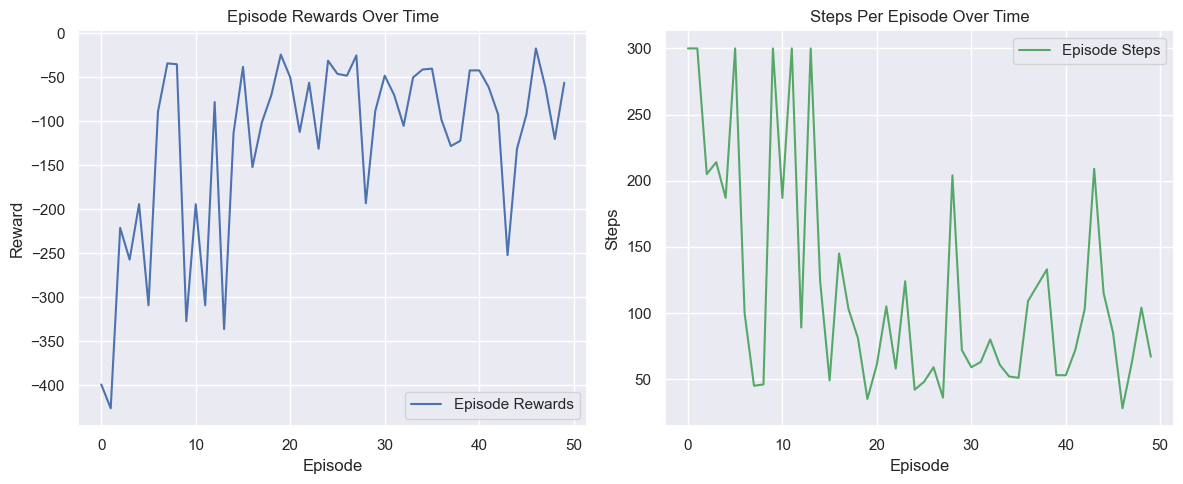

In [22]:
plot_with_matplotlib(episode_rewards, episode_steps)

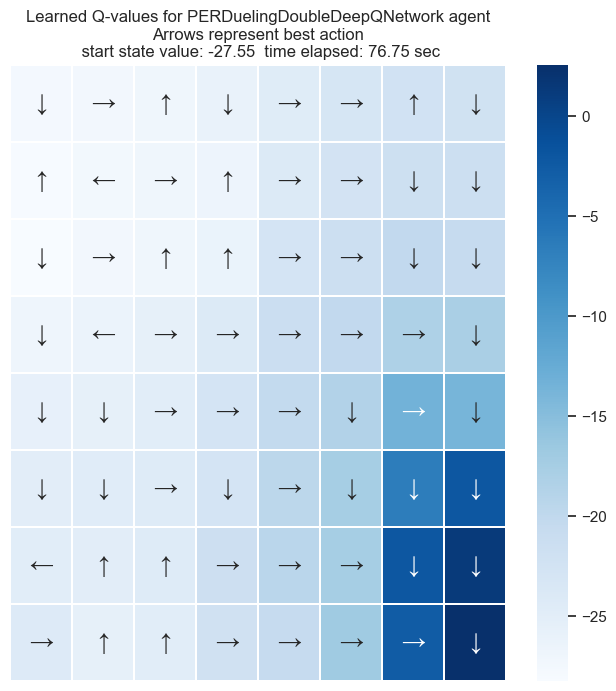

In [23]:
all_states_vectors = torch.tensor(modified_env.state_to_vector, dtype=torch.float32, device=agent.device)
qtable = agent.policy_net(all_states_vectors).detach().cpu().numpy()

plot_q_values_map(
        qtable=qtable, 
        map_size=map_size, 
        agent_name=type(agent).__name__, 
        time=elapsed,
        savefig_folder=None
        )

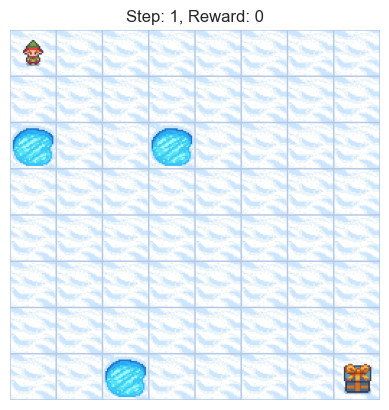

observation: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 0
q_values: tensor([-27.6527, -27.5488, -27.5811, -27.5698], device='cuda:0')
action: 1 - DOWN


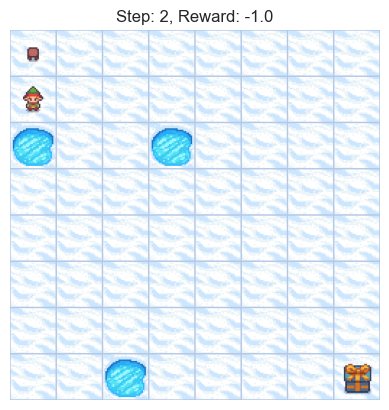

observation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 8
q_values: tensor([-28.1166, -29.5334, -28.0416, -28.0122], device='cuda:0')
action: 3 - UP


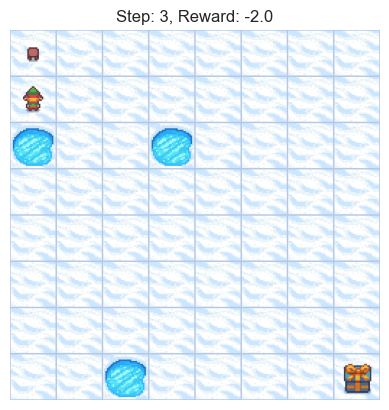

observation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 8
q_values: tensor([-28.1166, -29.5334, -28.0416, -28.0122], device='cuda:0')
action: 3 - UP


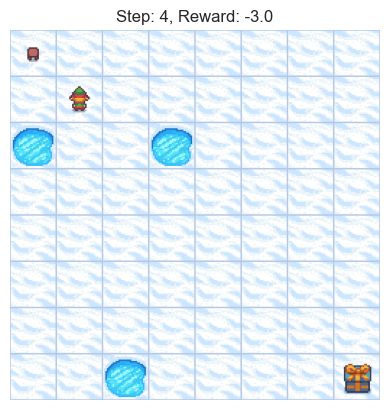

observation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
state: 9
q_values: tensor([-27.4058, -27.4548, -27.4254, -27.5083], device='cuda:0')
action: 0 - LEFT


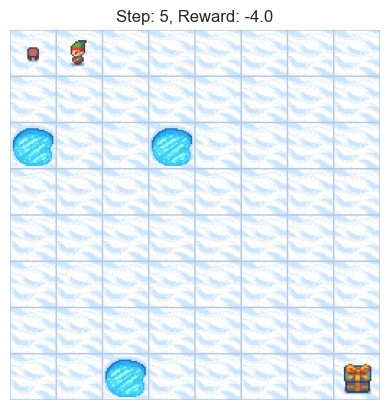

Episode 1 completed with total reward: -4.0 and total steps: 4


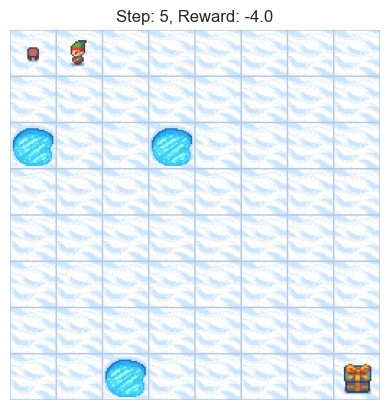

In [24]:
agent.verbose = True
agent.evaluating(seed=None)

run_and_display_env(modified_env, agent, num_episodes = 1, max_steps=5)

In [25]:
agent.verbose = False
agent.evaluating(seed=None)

# Set the directory for saving videos
video_dir = "./videos"
if not os.path.exists(video_dir):
    os.makedirs(video_dir)

run_and_record_env(modified_env, agent, video_dir=video_dir, num_episodes = 1, max_steps=None)

# Display the videos
play_videos_in_jupyter(video_dir)

# Remove the videos
remove_videos(video_dir)

c:\pythonvenvs\ailab\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at d:\Projects\RL\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Episode 1 completed with total reward: -49.0 and total steps: 60
Playing back the recorded episodes:
Playing rl-video-episode-0.mp4


Deleted: ./videos\rl-video-episode-0.mp4
All video files have been deleted.
